In [1]:
# Data manipulation libriaries
import numpy as np
import pandas as pd 

# Importing dataset from kaggle source
import os
for dirname, _, filenames in os.walk('https://www.kaggle.com/datasets/asifmehdiyev/bookingnew'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Data Visualization
import seaborn as sns

# **Reading / Importing Dataset**

In [2]:
dataset_path = '/kaggle/input/bookingnew/booking.csv'  # Replace with the actual path to the downloaded dataset file
df = pd.read_csv(dataset_path)

# **Get familiar with dataset**

In [3]:
df.head()

,review_title,reviewed_at,reviewed_by,images,crawled_at,url,hotel_name,hotel_url,avg_rating,nationality,rating,review_text,raw_review_text,tags,meta
0,Exceptional,11 July 2021,Kyrylo,NaN,"07/20/2021, 01:09:27",https://www.booking.com/reviews/be/hotel/villa...,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Poland,10.0,"Everything was perfect! Quite, cozy place to r...","<p class=""review_pos ""><svg aria-label=""Positi...",Business trip~Solo traveller~Junior Suite~Stay...,"{'language': 'en-gb', 'source': 'https://www.b..."
1,I highly recommend this b&b! We enjoyed it a lot!,24 November 2019,Dimitri,NaN,"07/20/2021, 01:09:27",https://www.booking.com/reviews/be/hotel/villa...,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Belgium,9.0,Very friendly host and perfect breakfast!,"<p class=""review_pos ""><svg aria-label=""Positi...",Leisure trip~Couple~Deluxe Suite~Stayed 1 nigh...,"{'language': 'en-gb', 'source': 'https://www.b..."
2,Exceptional,3 January 2020,Virginia,NaN,"07/20/2021, 01:09:27",https://www.booking.com/reviews/be/hotel/hydro...,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,9.2,United Kingdom,10.0,It was just what we wanted for a week by the b...,"<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip~Couple~Apartment with Sea View~St...,"{'language': 'en-gb', 'source': 'https://www.b..."
3,My stay in the house was a experiencing bliss ...,8 September 2019,Kannan,NaN,"07/20/2021, 01:09:28",https://www.booking.com/reviews/be/hotel/villa...,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Netherlands,10.0,My stay in the house was a experiencing bliss ...,"<p class=""review_pos ""><svg aria-label=""Positi...",Business trip~Solo traveller~Junior Suite~Stay...,"{'language': 'en-gb', 'source': 'https://www.b..."
4,One bedroom apartment with wonderful view and ...,23 June 2019,Sue,https://cf.bstatic.com/xdata/images/xphoto/squ...,"07/20/2021, 01:09:28",https://www.booking.com/reviews/be/hotel/hydro...,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,9.2,South Africa,9.2,The building itself has a very musty smell in ...,"<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip~People with friends~Apartment wit...,"{'language': 'en-gb', 'source': 'https://www.b..."


# **Prophet will be used for Time Series analysis and forecasting, so Prophet is needed to be installed with pip**

In [4]:
!pip install prophet

# **Import Prophet after pip install**

In [6]:
import prophet

In [1]:
# Another useful data visualization library
import matplotlib.pyplot as plt

# **EDA (Exploratory Data analysis) process starts**

In [9]:
df.shape

(26386, 15)

In [10]:
df.isnull().sum()

review_title           1
reviewed_at            0
reviewed_by            0
images             25632
crawled_at             0
url                    0
hotel_name             0
hotel_url              0
avg_rating             0
nationality           16
rating                 0
review_text            0
raw_review_text        0
tags                   0
meta                   0
dtype: int64

# **Dropping some unnecessary columns**

In [11]:
df.drop(['images', 'meta'], axis=1, inplace=True)
df.head()

,review_title,reviewed_at,reviewed_by,crawled_at,url,hotel_name,hotel_url,avg_rating,nationality,rating,review_text,raw_review_text,tags
0,Exceptional,11 July 2021,Kyrylo,"07/20/2021, 01:09:27",https://www.booking.com/reviews/be/hotel/villa...,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Poland,10.0,"Everything was perfect! Quite, cozy place to r...","<p class=""review_pos ""><svg aria-label=""Positi...",Business trip~Solo traveller~Junior Suite~Stay...
1,I highly recommend this b&b! We enjoyed it a lot!,24 November 2019,Dimitri,"07/20/2021, 01:09:27",https://www.booking.com/reviews/be/hotel/villa...,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Belgium,9.0,Very friendly host and perfect breakfast!,"<p class=""review_pos ""><svg aria-label=""Positi...",Leisure trip~Couple~Deluxe Suite~Stayed 1 nigh...
2,Exceptional,3 January 2020,Virginia,"07/20/2021, 01:09:27",https://www.booking.com/reviews/be/hotel/hydro...,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,9.2,United Kingdom,10.0,It was just what we wanted for a week by the b...,"<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip~Couple~Apartment with Sea View~St...
3,My stay in the house was a experiencing bliss ...,8 September 2019,Kannan,"07/20/2021, 01:09:28",https://www.booking.com/reviews/be/hotel/villa...,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Netherlands,10.0,My stay in the house was a experiencing bliss ...,"<p class=""review_pos ""><svg aria-label=""Positi...",Business trip~Solo traveller~Junior Suite~Stay...
4,One bedroom apartment with wonderful view and ...,23 June 2019,Sue,"07/20/2021, 01:09:28",https://www.booking.com/reviews/be/hotel/hydro...,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,9.2,South Africa,9.2,The building itself has a very musty smell in ...,"<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip~People with friends~Apartment wit...


# **Checking info of dataset**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26386 entries, 0 to 26385
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review_title     26385 non-null  object 
 1   reviewed_at      26386 non-null  object 
 2   reviewed_by      26386 non-null  object 
 3   crawled_at       26386 non-null  object 
 4   url              26386 non-null  object 
 5   hotel_name       26386 non-null  object 
 6   hotel_url        26386 non-null  object 
 7   avg_rating       26386 non-null  float64
 8   nationality      26370 non-null  object 
 9   rating           26386 non-null  float64
 10  review_text      26386 non-null  object 
 11  raw_review_text  26386 non-null  object 
 12  tags             26386 non-null  object 
dtypes: float64(2), object(11)
memory usage: 2.6+ MB


In [13]:
df['avg_rating'].max()

10.0

In [14]:
df['nationality'].value_counts()

United Kingdom    6725
Belgium           4342
Netherlands       2045
Germany           1300
United States     1173
                  ... 
Seychelles           1
Bahamas              1
Reunion              1
Maldives             1
Swaziland            1
Name: nationality, Length: 163, dtype: int64

In [15]:
df['hotel_name'].value_counts()

Motel One Brussels                               846
Marivaux Hotel                                   449
Snuffel Hostel                                   399
Hostel Bruegel                                   373
NH Brussels EU Berlaymont                        362
                                                ... 
appartement stylé dans maison bourgeoise           2
Carmius - Back to simple life                      2
Majestic Apartment With Breathtaking Sea View      2
Lichtrijke loft bij restaurant Den Olifant         2
Hotel Neuvice                                      1
Name: hotel_name, Length: 819, dtype: int64

# **Describe is used for statistical overview of numerical columns**

In [16]:
df.describe()

,avg_rating,rating
count,26386.000000,26386.000000
mean,8.449242,8.560669
std,0.716427,1.566554
min,3.800000,1.000000
25%,8.100000,7.900000
50%,8.500000,9.000000
75%,8.900000,10.000000
max,10.000000,10.000000


In [17]:
df.drop(['raw_review_text'], axis=1, inplace=True)
df.head()

,review_title,reviewed_at,reviewed_by,crawled_at,url,hotel_name,hotel_url,avg_rating,nationality,rating,review_text,tags
0,Exceptional,11 July 2021,Kyrylo,"07/20/2021, 01:09:27",https://www.booking.com/reviews/be/hotel/villa...,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Poland,10.0,"Everything was perfect! Quite, cozy place to r...",Business trip~Solo traveller~Junior Suite~Stay...
1,I highly recommend this b&b! We enjoyed it a lot!,24 November 2019,Dimitri,"07/20/2021, 01:09:27",https://www.booking.com/reviews/be/hotel/villa...,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Belgium,9.0,Very friendly host and perfect breakfast!,Leisure trip~Couple~Deluxe Suite~Stayed 1 nigh...
2,Exceptional,3 January 2020,Virginia,"07/20/2021, 01:09:27",https://www.booking.com/reviews/be/hotel/hydro...,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,9.2,United Kingdom,10.0,It was just what we wanted for a week by the b...,Leisure trip~Couple~Apartment with Sea View~St...
3,My stay in the house was a experiencing bliss ...,8 September 2019,Kannan,"07/20/2021, 01:09:28",https://www.booking.com/reviews/be/hotel/villa...,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Netherlands,10.0,My stay in the house was a experiencing bliss ...,Business trip~Solo traveller~Junior Suite~Stay...
4,One bedroom apartment with wonderful view and ...,23 June 2019,Sue,"07/20/2021, 01:09:28",https://www.booking.com/reviews/be/hotel/hydro...,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,9.2,South Africa,9.2,The building itself has a very musty smell in ...,Leisure trip~People with friends~Apartment wit...


In [18]:
df['tags'].value_counts()

Leisure trip~Couple~Double Room~Stayed 1 night~Submitted via mobile                                    309
Leisure trip~Couple~Standard Double Room~Stayed 1 night~Submitted via mobile                           268
Leisure trip~Couple~Standard Double Room~Stayed 2 nights~Submitted via mobile                          195
Leisure trip~Couple~Double Room~Stayed 2 nights~Submitted via mobile                                   167
Leisure trip~Couple~Double Room~Stayed 1 night                                                         127
                                                                                                      ... 
Leisure trip~Group~Two-Bedroom House~Stayed 7 nights                                                     1
Leisure trip~People with friends~Executive Double or Twin Room~Stayed 4 nights~Submitted via mobile      1
Business trip~Group~Large One-Bedroom Apartment~Stayed 4 nights~Submitted via mobile                     1
Leisure trip~Couple~Standard Double R

# **Checking null values with Heatmap**

<Axes: >

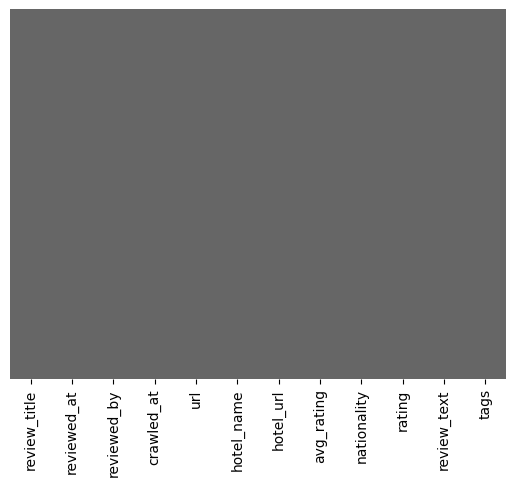

In [19]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='Dark2_r')

In [20]:
df.isnull().sum()

review_title     1
reviewed_at      0
reviewed_by      0
crawled_at       0
url              0
hotel_name       0
hotel_url        0
avg_rating       0
nationality     16
rating           0
review_text      0
tags             0
dtype: int64

# **Review date will be mostly used in time series analysis and forecasting process, so, we have to change the name to be more accurate**

In [21]:
# Change the name of a single column
df.rename(columns={'reviewed_at': 'review_date'}, inplace=True)

In [22]:
df['review_date'].value_counts()

16 February 2020    83
29 October 2018     82
22 April 2019       79
27 October 2019     75
8 September 2019    74
                    ..
6 June 2020          1
26 April 2020        1
4 April 2020         1
12 May 2020          1
24 October 2020      1
Name: review_date, Length: 1056, dtype: int64

In [23]:
df['review_date']=pd.to_datetime(df['review_date'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26386 entries, 0 to 26385
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   review_title  26385 non-null  object        
 1   review_date   26386 non-null  datetime64[ns]
 2   reviewed_by   26386 non-null  object        
 3   crawled_at    26386 non-null  object        
 4   url           26386 non-null  object        
 5   hotel_name    26386 non-null  object        
 6   hotel_url     26386 non-null  object        
 7   avg_rating    26386 non-null  float64       
 8   nationality   26370 non-null  object        
 9   rating        26386 non-null  float64       
 10  review_text   26386 non-null  object        
 11  tags          26386 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 2.4+ MB


# **Visualization for showing AVG Rating according to Review Date**

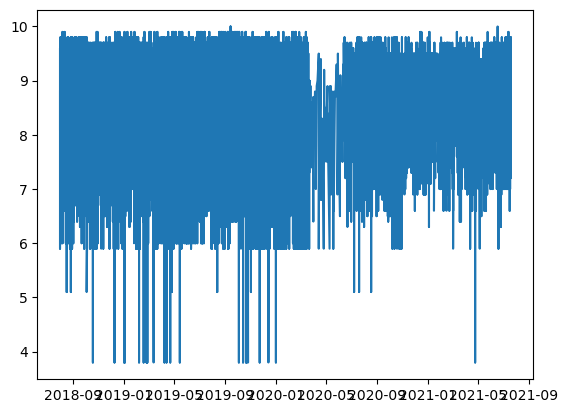

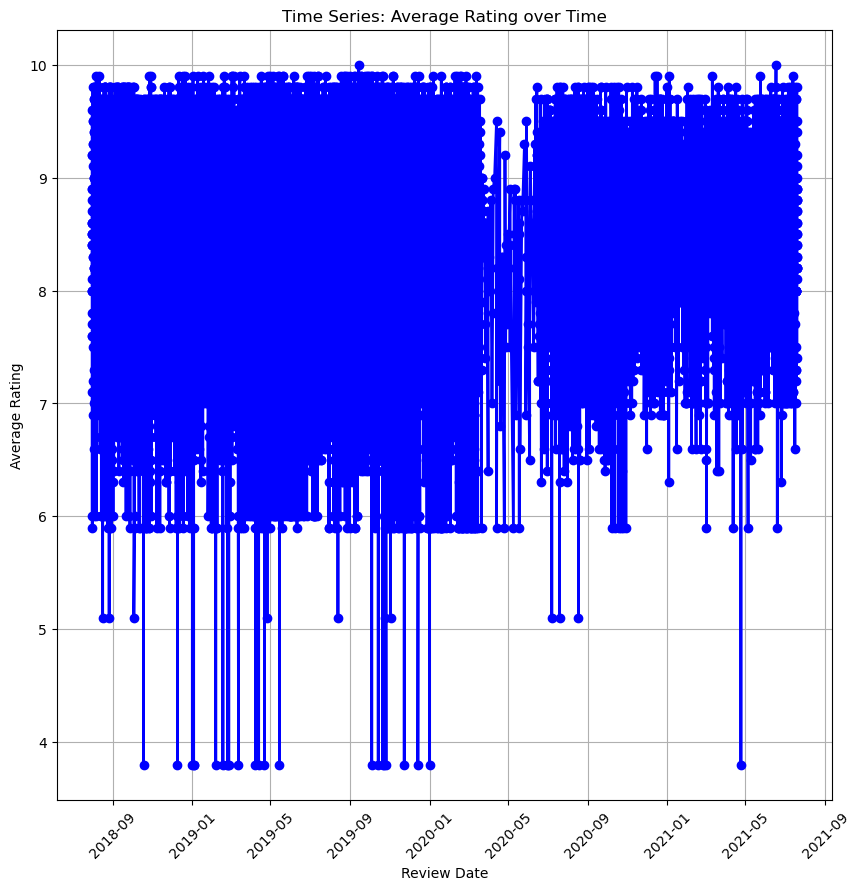

In [25]:
df.sort_values(by = 'review_date', inplace=True)

# Create line chart
plt.plot(df['review_date'], df['avg_rating'])

plt.figure(figsize = (10,10))
plt.plot(df['review_date'], df['avg_rating'], marker='o', linestyle='-', color='blue', linewidth=2)

# Add labels and title
plt.xlabel("Review Date")
plt.ylabel("Average Rating")
plt.title("Time Series: Average Rating over Time")

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45)

plt.grid(True)

# Display the plot
plt.show()

In [26]:
df.columns

Index(['review_title', 'review_date', 'reviewed_by', 'crawled_at', 'url',
       'hotel_name', 'hotel_url', 'avg_rating', 'nationality', 'rating',
       'review_text', 'tags'],
      dtype='object')

# **AVG Rating according to Top countries**

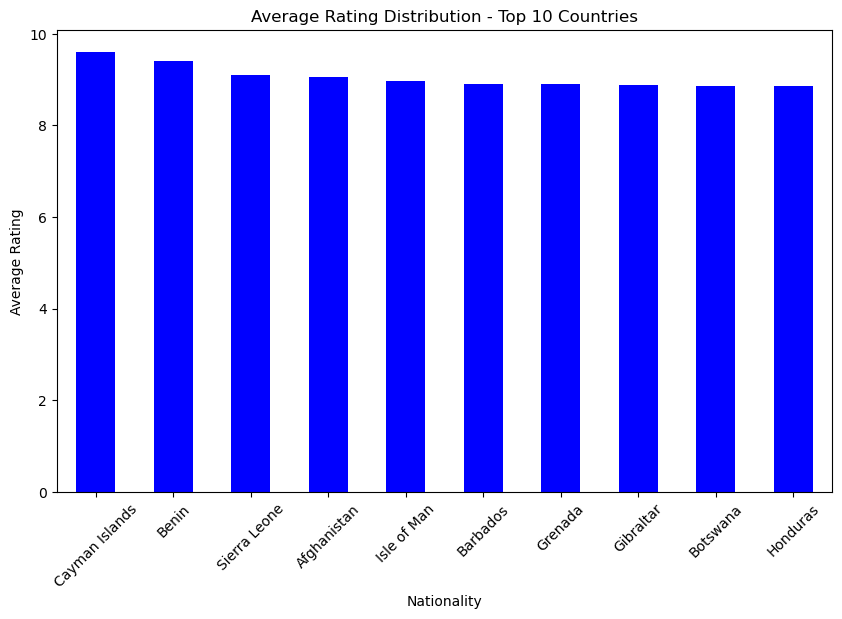

In [27]:
# Number of top countries to consider
top_countries = 10

# Calculate the mean average rating for each nationality
avg_rating_by_country = df.groupby('nationality')['avg_rating'].mean()

# Sort the average ratings in descending order and select the top countries
top_countries_avg_rating = avg_rating_by_country.nlargest(top_countries)

# Plot the average rating distribution for the top countries
plt.figure(figsize=(10, 6))  # Adjust the figure size as desired (width, height)
top_countries_avg_rating.plot(kind='bar', color='blue')

# Add labels and title
plt.xlabel("Nationality")
plt.ylabel("Average Rating")
plt.title(f"Average Rating Distribution - Top {top_countries} Countries")

# Rotate x-axis tick labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()

# **AVG Rating according to least countries**

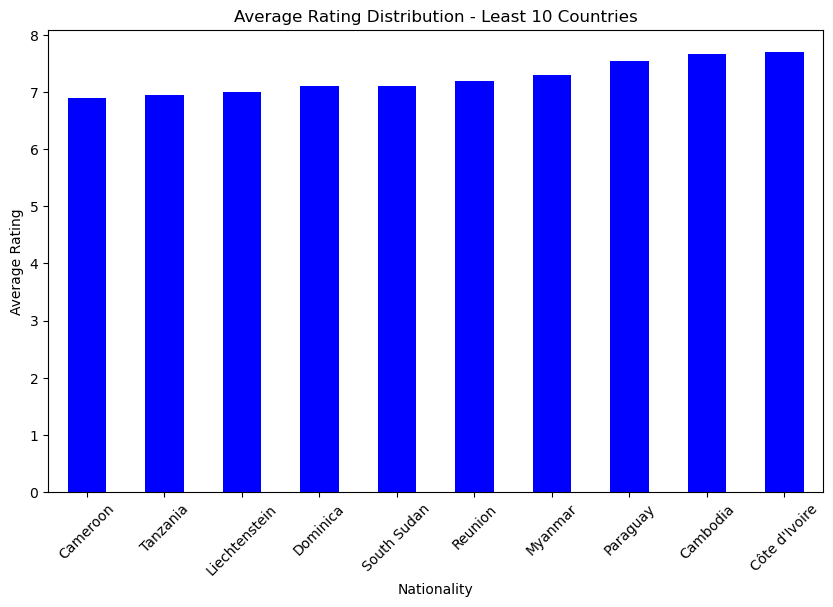

In [28]:
# Number of least countries to consider
least_countries = 10

# Calculate the mean average rating for each nationality
avg_rating_by_country = df.groupby('nationality')['avg_rating'].mean()

# Sort the average ratings in ascending order and select the least countries
least_countries_avg_rating = avg_rating_by_country.nsmallest(least_countries)

# Plot the average rating distribution for the least countries
plt.figure(figsize=(10, 6))  # Adjust the figure size as desired (width, height)
least_countries_avg_rating.plot(kind='bar', color='blue')

# Add labels and title
plt.xlabel("Nationality")
plt.ylabel("Average Rating")
plt.title(f"Average Rating Distribution - Least {least_countries} Countries")

# Rotate x-axis tick labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()

# **We can specify some needed countries and make AVG Rating Viz accordingly**

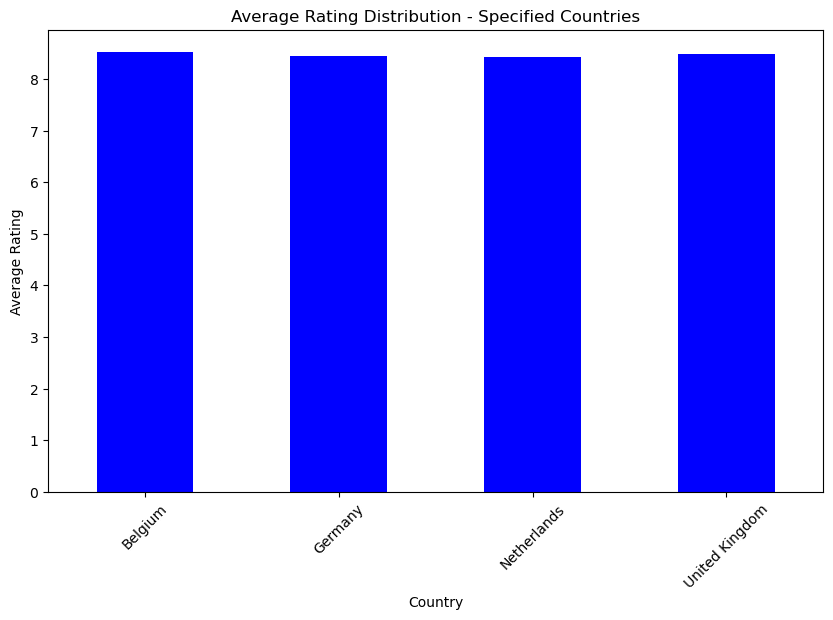

In [29]:
# Specify the countries of interest
countries_of_interest = ['United Kingdom', 'Belgium', 'Netherlands', 'Germany', 'US']

# Filter the dataset for the specified countries
filtered_dataset = df[df['nationality'].isin(countries_of_interest)]

# Calculate the mean average rating for each country
avg_rating_by_country = filtered_dataset.groupby('nationality')['avg_rating'].mean()

# Plot the average rating distribution for the specified countries
plt.figure(figsize=(10, 6))  # Adjust the figure size as desired (width, height)
avg_rating_by_country.plot(kind='bar', color='blue')

# Add labels and title
plt.xlabel("Country")
plt.ylabel("Average Rating")
plt.title("Average Rating Distribution - Specified Countries")

# Rotate x-axis tick labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [30]:
df['hotel_name'].value_counts()

Motel One Brussels                                         846
Marivaux Hotel                                             449
Snuffel Hostel                                             399
Hostel Bruegel                                             373
NH Brussels EU Berlaymont                                  362
                                                          ... 
appartement stylé dans maison bourgeoise                     2
Charleroi Apartotel Des Jardins De La Fontaine Qui Bout      2
Apartment casuaLLoft                                         2
Lichtrijke loft bij restaurant Den Olifant                   2
Hotel Neuvice                                                1
Name: hotel_name, Length: 819, dtype: int64

# **Checking top hotelts according to AVG Rating**

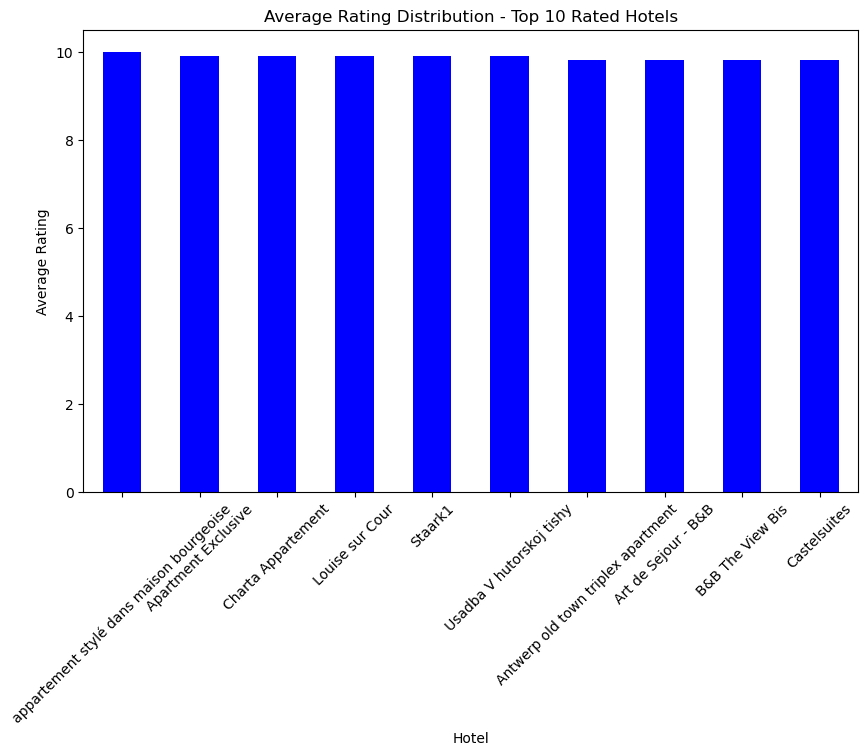

In [31]:
# Number of top hotels to consider
top_hotels = 10

# Calculate the mean average rating for each hotel
avg_rating_by_hotel = df.groupby('hotel_name')['avg_rating'].mean()

# Sort the average ratings in descending order and select the top hotels
top_rated_hotels = avg_rating_by_hotel.nlargest(top_hotels)

# Plot the average rating distribution for the top rated hotels
plt.figure(figsize=(10, 6))  # Adjust the figure size as desired (width, height)
top_rated_hotels.plot(kind='bar', color='blue')

# Add labels and title
plt.xlabel("Hotel")
plt.ylabel("Average Rating")
plt.title(f"Average Rating Distribution - Top {top_hotels} Rated Hotels")

# Rotate x-axis tick labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()

# **Checking least hotels according to AVG Rating**

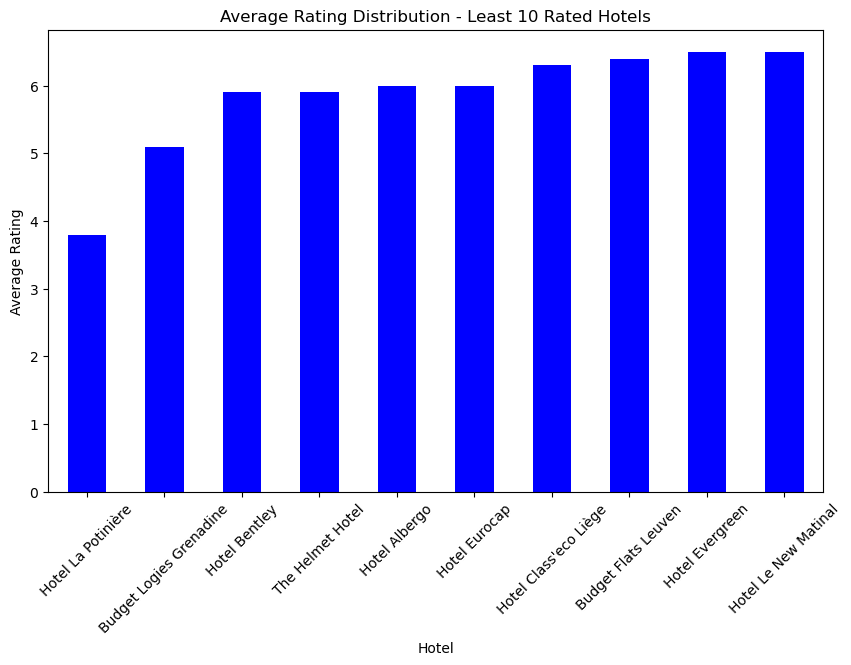

In [32]:
# Number of least hotels to consider
least_hotels = 10

# Calculate the mean average rating for each hotel
avg_rating_by_hotel = df.groupby('hotel_name')['avg_rating'].mean()

# Sort the average ratings in ascending order and select the least hotels
least_rated_hotels = avg_rating_by_hotel.nsmallest(least_hotels)

# Plot the average rating distribution for the least rated hotels
plt.figure(figsize=(10, 6))  # Adjust the figure size as desired (width, height)
least_rated_hotels.plot(kind='bar', color='blue')

# Add labels and title
plt.xlabel("Hotel")
plt.ylabel("Average Rating")
plt.title(f"Average Rating Distribution - Least {least_hotels} Rated Hotels")

# Rotate x-axis tick labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [33]:
corr_grid = df.corr()
corr_grid

WARNING - (py.warnings._showwarnmsg) - /tmp/ipykernel_670/3225461267.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_grid = df.corr()



,avg_rating,rating
avg_rating,1.00000,0.47073
rating,0.47073,1.00000


# **Correlation heatmap**

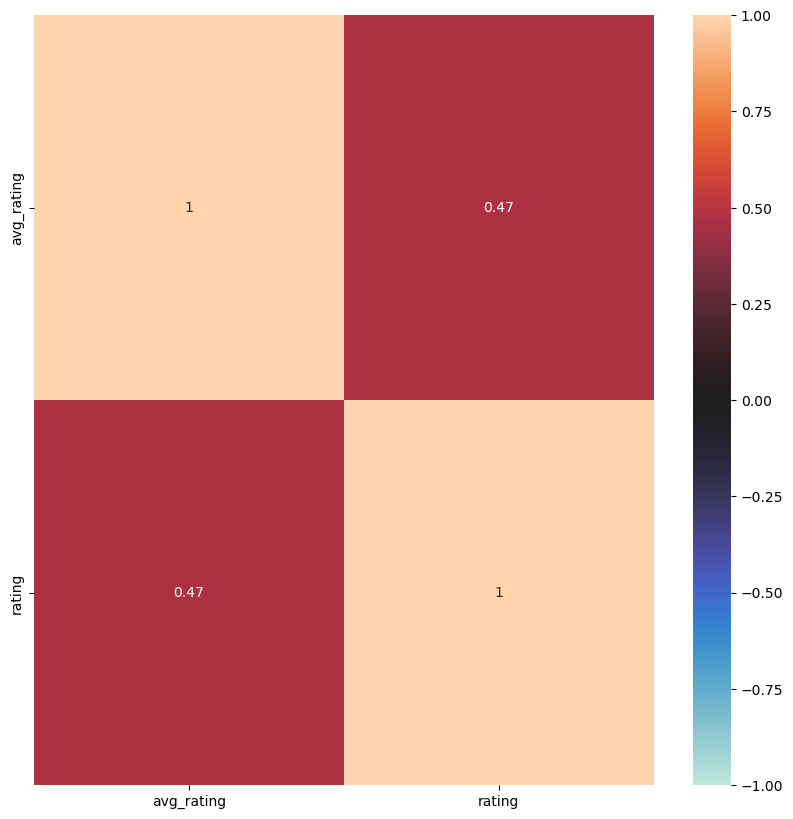

In [34]:
plt.figure(figsize = (10,10))
sns.heatmap(corr_grid,vmin=-1,center=0,vmax=1, annot = True)
plt.show()

In [35]:
df.duplicated().sum()

0

# **Outlier detection for dataset before modelling process**

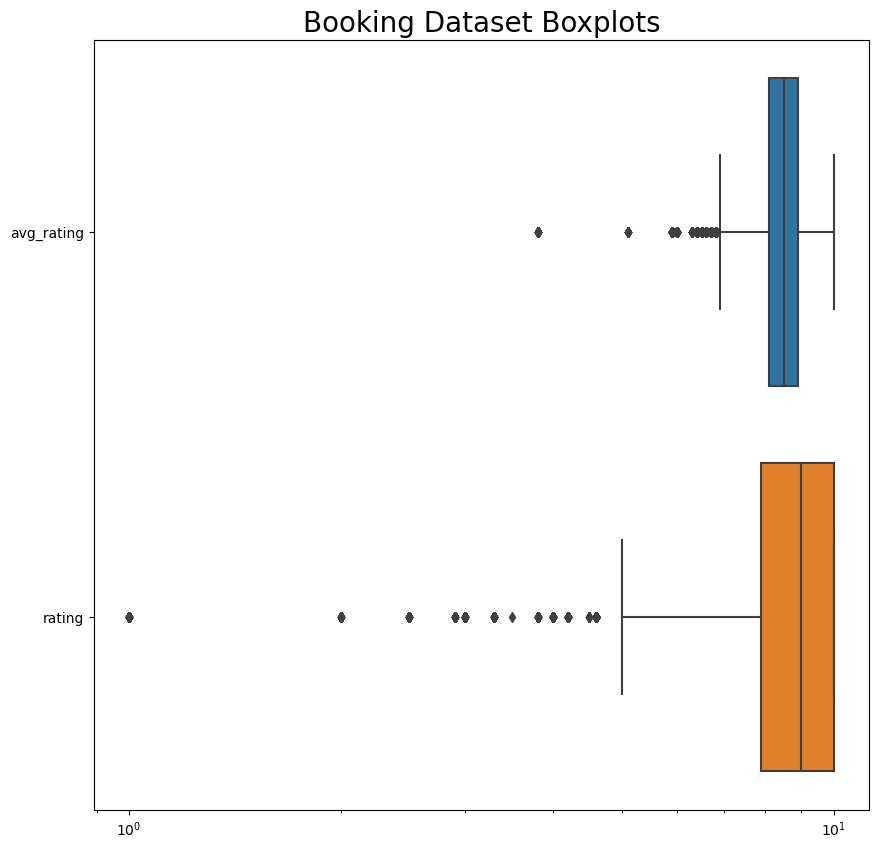

In [36]:
plt.figure(figsize = (10,10))
ax = sns.boxplot(data=df, orient="h")
ax.set_title('Booking Dataset Boxplots', fontsize=20)
ax.set(xscale='log')
plt.show()

# **Outlier treatment with IQR method**

In [37]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range
lowerbound,upperbound = outlier_treatment(df['avg_rating'])
df['avg_rating']=np.clip(df['avg_rating'],a_min=lowerbound,a_max=upperbound)

In [38]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range
lowerbound,upperbound = outlier_treatment(df['rating'])
df['rating']=np.clip(df['rating'],a_min=lowerbound,a_max=upperbound)

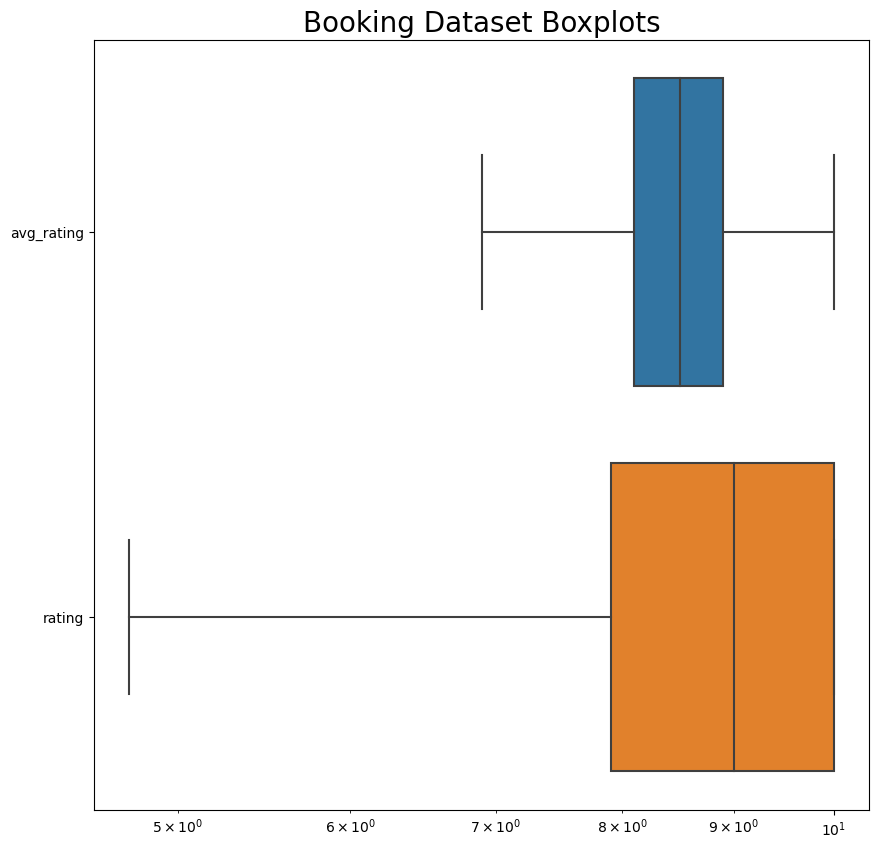

In [39]:
plt.figure(figsize = (10,10))
ax = sns.boxplot(data=df, orient="h")
ax.set_title('Booking Dataset Boxplots', fontsize=20)
ax.set(xscale='log')
plt.show()

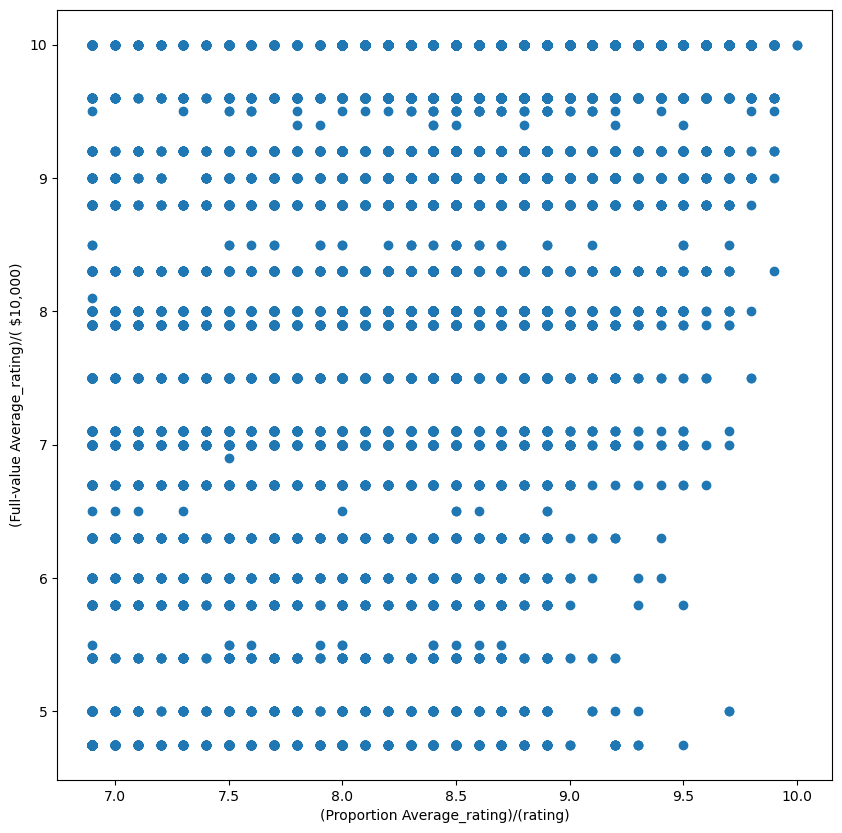

In [40]:
# Scatter plot
fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(df['avg_rating'], df['rating'])

# x-axis label
ax.set_xlabel('(Proportion Average_rating)/(rating)')

# y-axis label
ax.set_ylabel('(Full-value Average_rating)/( $10,000)')
plt.show()

Text(0.5, 1.0, 'Distribition_of_average_rating')

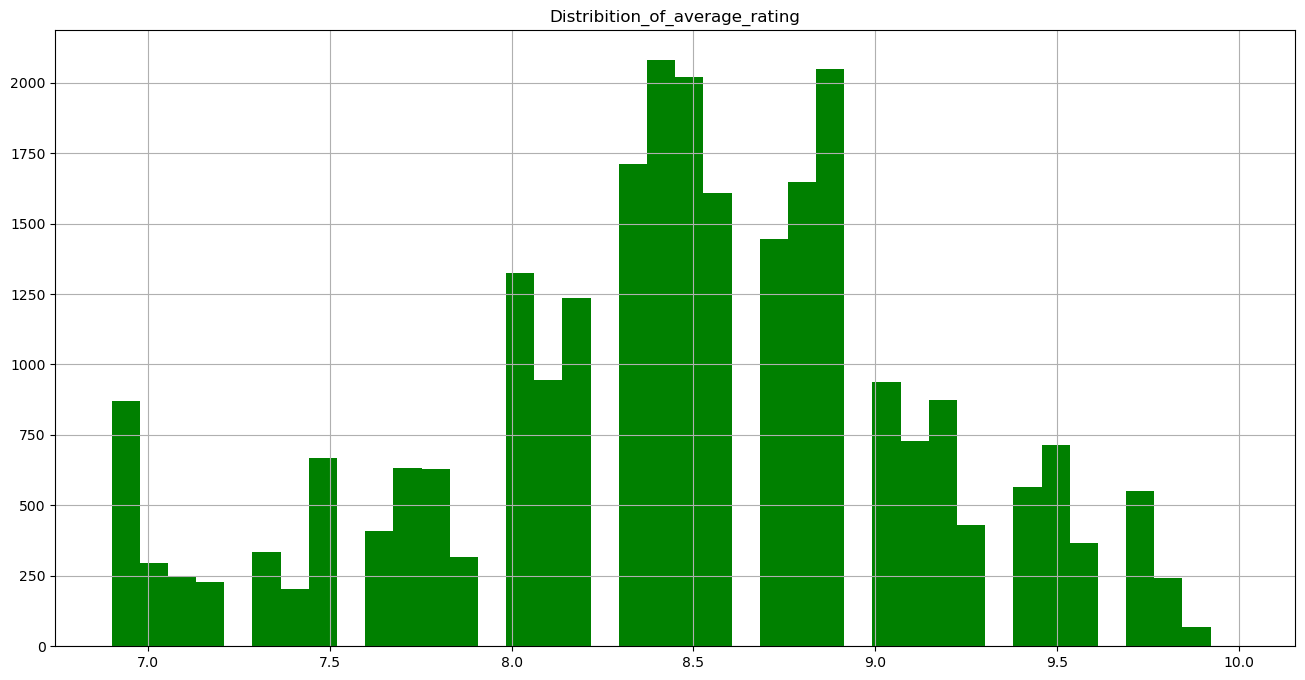

In [41]:
#distribution plot of the Average Rating
df['avg_rating'].hist(color='green',bins=40,figsize=(16,8)).set_title('Distribition_of_average_rating')

Text(0.5, 1.0, 'Distribition_of_rating')

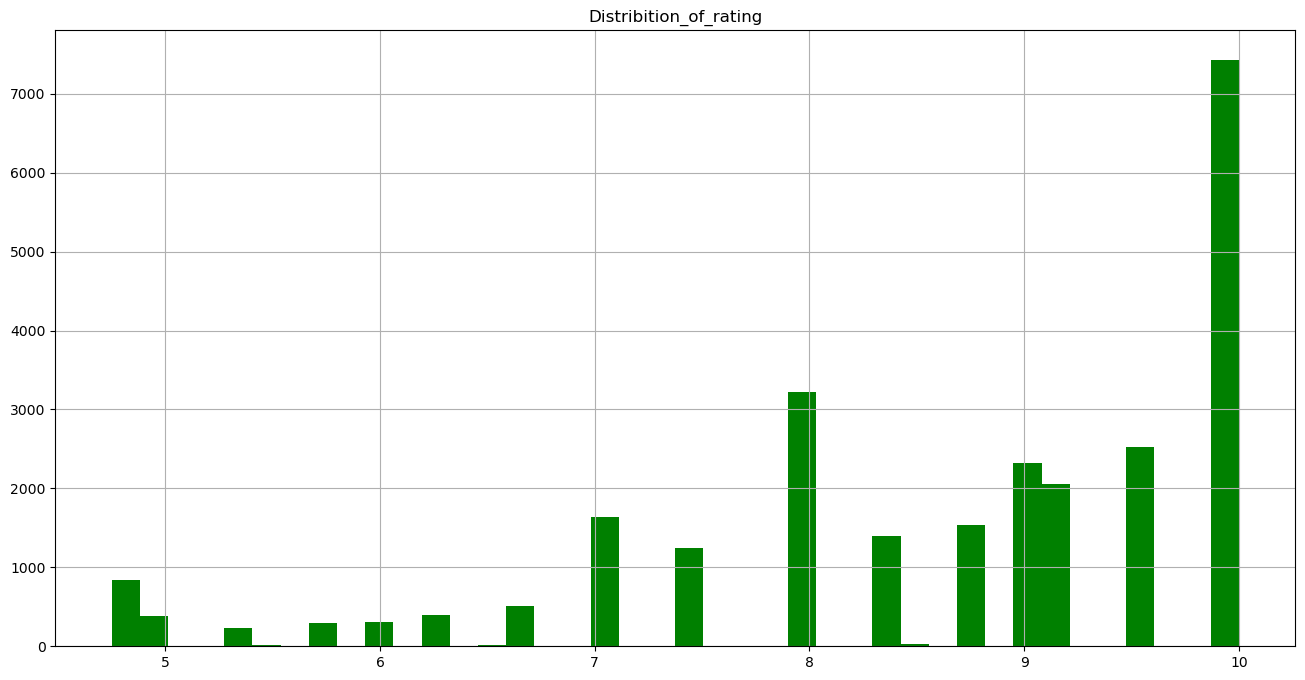

In [42]:
#distribution plot of the Rating
df['rating'].hist(color='green',bins=40,figsize=(16,8)).set_title('Distribition_of_rating')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26386 entries, 9123 to 4822
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   review_title  26385 non-null  object        
 1   review_date   26386 non-null  datetime64[ns]
 2   reviewed_by   26386 non-null  object        
 3   crawled_at    26386 non-null  object        
 4   url           26386 non-null  object        
 5   hotel_name    26386 non-null  object        
 6   hotel_url     26386 non-null  object        
 7   avg_rating    26386 non-null  float64       
 8   nationality   26370 non-null  object        
 9   rating        26386 non-null  float64       
 10  review_text   26386 non-null  object        
 11  tags          26386 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 2.6+ MB


In [44]:
df.head()

,review_title,review_date,reviewed_by,crawled_at,url,hotel_name,hotel_url,avg_rating,nationality,rating,review_text,tags
9123,Exceptional,2018-07-31,Anonymous,"07/20/2021, 01:30:09",https://www.booking.com/reviews/be/hotel/snuff...,Snuffel Hostel,https://www.booking.com/hotel/be/snuffel-hoste...,8.8,Argentina,10.00,There are no comments available for this review,Leisure trip~Solo traveller~Bed in 4 Bed Femal...
15817,Disappointing stay in Liege,2018-07-31,P,"07/20/2021, 01:45:58",https://www.booking.com/reviews/be/hotel/smart...,Smartflats Design - Opera,https://www.booking.com/hotel/be/smartflats-op...,7.6,Netherlands,4.75,We was let down with the apartment itself. It ...,Leisure trip~Couple~Two-Bedroom Apartment with...
14632,Good,2018-07-31,Jeri,"07/20/2021, 01:42:49",https://www.booking.com/reviews/be/hotel/exclu...,B&B Number 11 Exclusive Guesthouse,https://www.booking.com/hotel/be/exclusive-gue...,9.6,United States,7.90,There are no comments available for this review,Leisure trip~Couple~Superior Double Room~Staye...
20720,Couldn’t get there.,2018-07-31,Anonymous,"07/20/2021, 02:01:11",https://www.booking.com/reviews/be/hotel/the-b...,The best known village of Belgium,https://www.booking.com/hotel/be/the-best-know...,7.6,Colombia,5.80,If you go on saturday or Sunday it’s imposible...,Leisure trip~Solo traveller~Budget Double Room...
5457,Exceptional,2018-07-31,Anonymous,"07/20/2021, 01:21:45",https://www.booking.com/reviews/be/hotel/pronk...,B&B Pronkenburg,https://www.booking.com/hotel/be/pronkenburg.e...,8.6,Belgium,9.60,There are no comments available for this review,Leisure trip~Family with young children~Family...


In [45]:
df['review_date'].min()

Timestamp('2018-07-31 00:00:00')

In [46]:
df['review_date'].max()

Timestamp('2021-07-19 00:00:00')

In [47]:
# Number of top hotels to consider
top_hotels = 10

# Calculate the mean average rating for each hotel
avg_rating_by_hotel = df.groupby('hotel_name')['avg_rating'].mean()

# Sort the average ratings in descending order and select the top hotels
top_rated_hotels = avg_rating_by_hotel.nlargest(top_hotels)

# Print the list of top rated hotels
print("Top Rated Hotels:")
for hotel_name in top_rated_hotels.index:
    print(hotel_name)

Top Rated Hotels:
appartement stylé dans maison bourgeoise
Apartment Exclusive
Charta Appartement
Louise sur Cour
Staark1
Usadba V hutorskoj tishy
Antwerp old town triplex apartment
Art de Sejour - B&B
B&B The View Bis
Castelsuites


In [48]:
hotel_1 = df.loc[df['hotel_name'] == 'Dansaert Hotel']

In [49]:
#minimum and maximum dates
hotel_1['review_date'].min(), hotel_1['review_date'].max()

(Timestamp('2018-07-31 00:00:00'), Timestamp('2020-05-29 00:00:00'))

In [50]:
df.columns

Index(['review_title', 'review_date', 'reviewed_by', 'crawled_at', 'url',
       'hotel_name', 'hotel_url', 'avg_rating', 'nationality', 'rating',
       'review_text', 'tags'],
      dtype='object')

In [51]:
#removing columns we don't need and check if there is any missing value
cols = ['review_title', 'reviewed_by', 'crawled_at', 'url', 'hotel_url', 
        'nationality', 'rating', 'review_text', 'tags']
hotel_1.drop(cols, axis=1, inplace=True)
hotel_1 = hotel_1.sort_values('review_date')
hotel_1.isnull().sum()

WARNING - (py.warnings._showwarnmsg) - /tmp/ipykernel_670/3157091820.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_1.drop(cols, axis=1, inplace=True)



review_date    0
hotel_name     0
avg_rating     0
dtype: int64

In [52]:
hotel_1['review_date'].unique()
hotel_1 = hotel_1.groupby(['review_date']).sum().reset_index()
hotel_1

WARNING - (py.warnings._showwarnmsg) - /tmp/ipykernel_670/3089869505.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hotel_1 = hotel_1.groupby(['review_date']).sum().reset_index()



,review_date,avg_rating
0,2018-07-31,8.0
1,2018-08-02,16.0
2,2018-08-04,8.0
3,2018-08-06,16.0
4,2018-08-13,16.0
...,...,...
114,2020-03-07,8.0
115,2020-03-08,8.0
116,2020-03-09,16.0
117,2020-03-13,8.0


In [53]:
#groupby index date
hotel_1 = hotel_1.groupby('review_date')['avg_rating'].sum().reset_index()

In [54]:
#Indexing with Time Series Data
hotel_1 = hotel_1.set_index('review_date')
hotel_1.index

DatetimeIndex(['2018-07-31', '2018-08-02', '2018-08-04', '2018-08-06',
               '2018-08-13', '2018-08-18', '2018-08-20', '2018-08-22',
               '2018-08-23', '2018-08-25',
               ...
               '2020-02-25', '2020-02-27', '2020-02-28', '2020-03-01',
               '2020-03-04', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-13', '2020-05-29'],
              dtype='datetime64[ns]', name='review_date', length=119, freq=None)

In [55]:
y = hotel_1['avg_rating'].resample('MS').mean()

In [56]:
y['2018':]

review_date
2018-07-01     8.000000
2018-08-01    11.333333
2018-09-01     9.142857
2018-10-01     8.000000
2018-11-01          NaN
2018-12-01     8.000000
2019-01-01     8.000000
2019-02-01     8.000000
2019-03-01     8.000000
2019-04-01    12.000000
2019-05-01     9.000000
2019-06-01     9.454545
2019-07-01    10.000000
2019-08-01    13.333333
2019-09-01     8.000000
2019-10-01     8.000000
2019-11-01     8.000000
2019-12-01    12.571429
2020-01-01    12.000000
2020-02-01    10.461538
2020-03-01     9.333333
2020-04-01          NaN
2020-05-01     8.000000
Freq: MS, Name: avg_rating, dtype: float64

In [57]:
hotel_1['2018':].reset_index().sort_values('review_date',ascending=True)

,review_date,avg_rating
0,2018-07-31,8.0
1,2018-08-02,16.0
2,2018-08-04,8.0
3,2018-08-06,16.0
4,2018-08-13,16.0
...,...,...
114,2020-03-07,8.0
115,2020-03-08,8.0
116,2020-03-09,16.0
117,2020-03-13,8.0


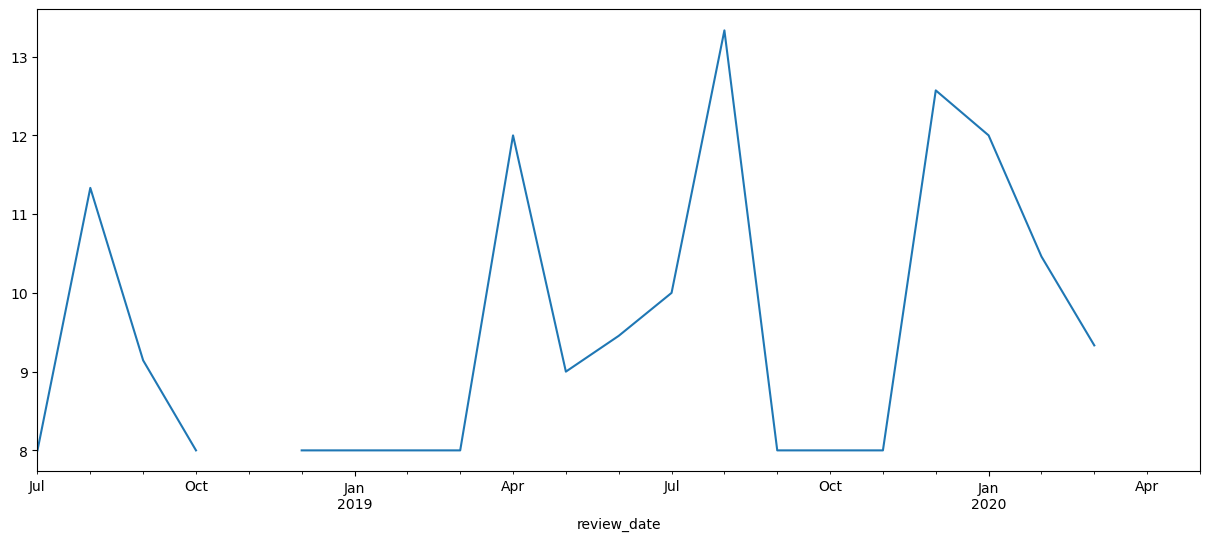

In [58]:
#visualizing time-series data
y.plot(figsize=(15, 6))
plt.show()

In [59]:
#selecting Dansaert Hotel and Suite City Apartments
hotel_1 = df.loc[df['hotel_name'] == 'Dansaert Hotel']
hotel_2 = df.loc[df['hotel_name'] == 'Suite & City Apartments']
hotel_1.shape, hotel_2.shape

((148, 12), (24, 12))

In [60]:
#data preparation

hotel_1 = hotel_1.sort_values('review_date')
hotel_2 = hotel_2.sort_values('review_date')
hotel_1 = hotel_1.groupby('review_date')['avg_rating'].sum().reset_index()
hotel_2 = hotel_2.groupby('review_date')['avg_rating'].sum().reset_index()
hotel_1 = hotel_1.set_index('review_date')
hotel_2 = hotel_2.set_index('review_date')
y_hotel_1 = hotel_1['avg_rating'].resample('MS').mean()
y_hotel_2 = hotel_2['avg_rating'].resample('MS').mean()
hotel_1 = pd.DataFrame({'review_date':y_hotel_1.index, 'avg_rating':y_hotel_1.values})
hotel_2 = pd.DataFrame({'review_date': y_hotel_2.index, 'avg_rating': y_hotel_2.values})
hotels = hotel_1.merge(hotel_2, how='inner', on='review_date')
hotels.rename(columns={'avg_rating_x': 'hotel_1', 'avg_rating_y': 'hotel_2'}, inplace=True)
hotels.head()

,review_date,hotel_1,hotel_2
0,2018-07-01,8.000000,8.9
1,2018-08-01,11.333333,8.9
2,2018-09-01,9.142857,8.9
3,2018-10-01,8.000000,8.9
4,2018-11-01,NaN,8.9


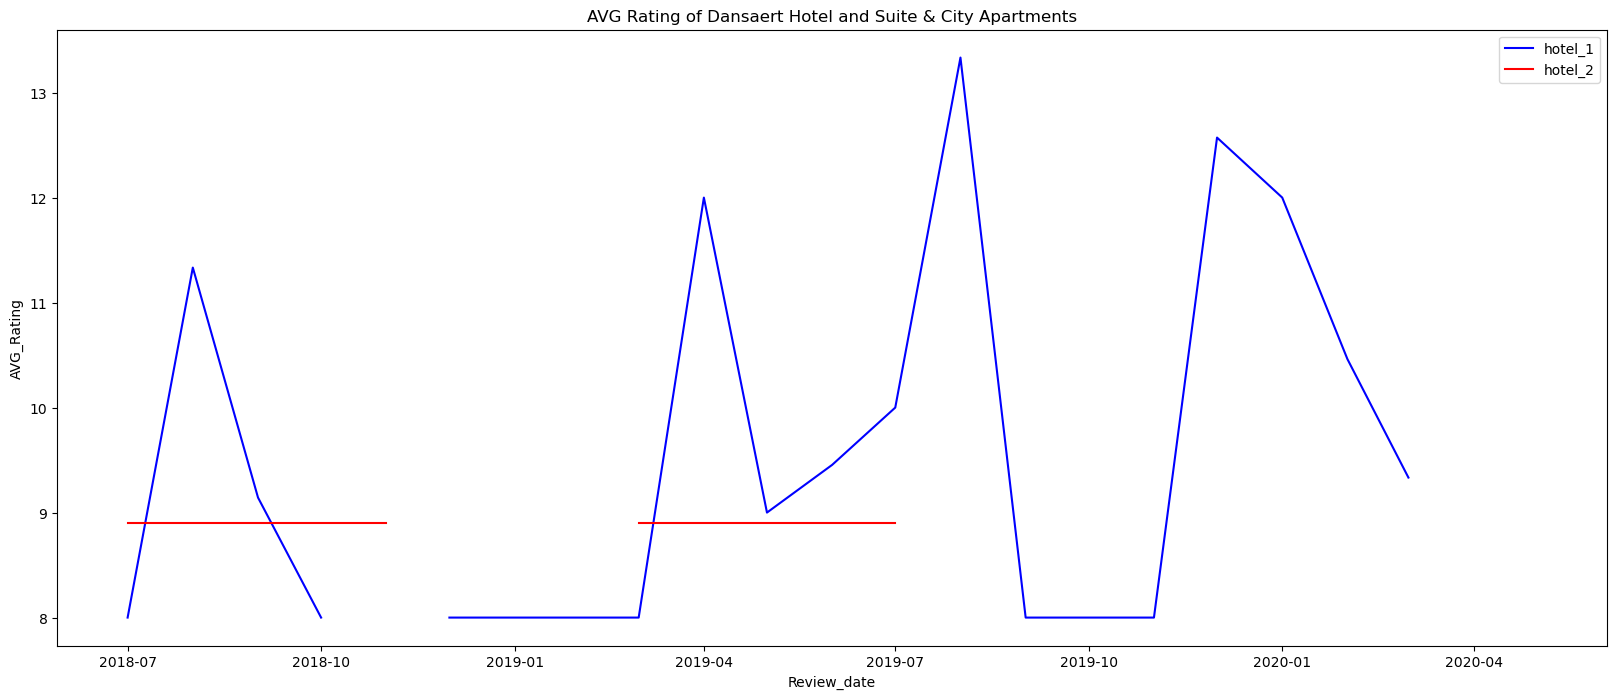

In [61]:
#plotting time series
plt.figure(figsize=(20, 8))
plt.plot(hotels['review_date'], hotels['hotel_1'], 'b-', label = 'hotel_1')
plt.plot(hotels['review_date'], hotels['hotel_2'], 'r-', label = 'hotel_2')
plt.xlabel('Review_date'); plt.ylabel('AVG_Rating'); plt.title('AVG Rating of Dansaert Hotel and Suite & City Apartments')
plt.legend();

# **Importing Prophet model**

In [62]:
from prophet import Prophet

# **Building Prophet model**

In [63]:
#craeating prophet model
hotel_1 = hotel_1.rename(columns={'review_date': 'ds', 'avg_rating': 'y'})
hotel_1_model = Prophet(interval_width=0.95)
hotel_1_model.fit(hotel_1)
hotel_2 = hotel_2.rename(columns={'review_date': 'ds', 'avg_rating': 'y'})
hotel_2_model = Prophet(interval_width=0.95)
hotel_2_model.fit(hotel_2)
hotel_1_forecast = hotel_1_model.make_future_dataframe(periods=36, freq='MS')
hotel_1_forecast = hotel_1_model.predict(hotel_1_forecast)
hotel_2_forecast = hotel_2_model.make_future_dataframe(periods=36, freq='MS')
hotel_2_forecast = hotel_2_model.predict(hotel_2_forecast)

13:35:47 - cmdstanpy - INFO - Chain [1] start processing
13:35:47 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1800x600 with 0 Axes>

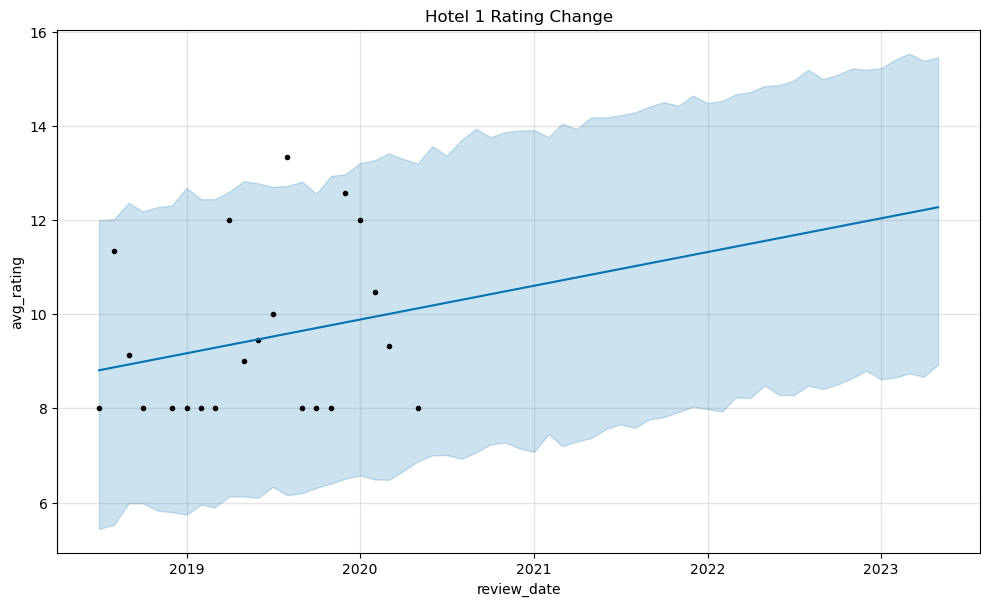

In [64]:
#plotting Avg Rating forecast
plt.figure(figsize=(18, 6))
hotel_1_model.plot(hotel_1_forecast, xlabel = 'review_date', ylabel = 'avg_rating')
plt.title('Hotel 1 Rating Change');

<Figure size 1800x600 with 0 Axes>

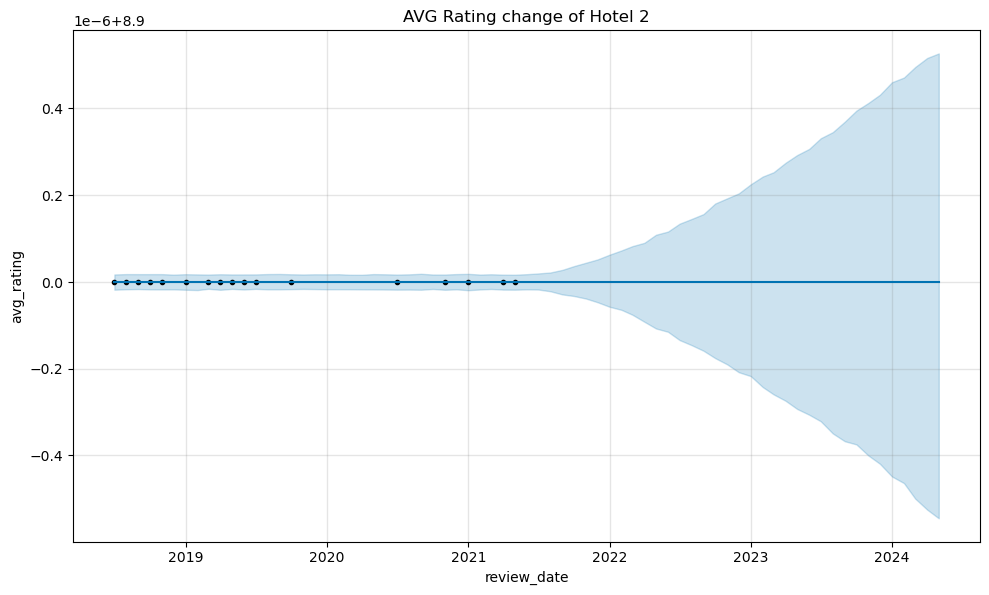

In [65]:
#plotting AVG Rating -> Review Date forecast
plt.figure(figsize=(18, 6))
hotel_2_model.plot(hotel_2_forecast, xlabel = 'review_date', ylabel = 'avg_rating')
plt.title('AVG Rating change of Hotel 2');

In [66]:
hotel_1_names = ['hotel_1_%s' % column for column in hotel_1_forecast.columns]
hotel_2_names = ['hotel_2_%s' % column for column in hotel_2_forecast.columns]
merge_hotel_1_forecast = hotel_1_forecast.copy()
merge_hotel_2_forecast = hotel_2_forecast.copy()
merge_hotel_1_forecast.columns = hotel_1_names
merge_hotel_2_forecast.columns = hotel_2_names
forecast = pd.merge(merge_hotel_1_forecast, merge_hotel_2_forecast, how = 'inner', left_on = 'hotel_1_ds', right_on = 'hotel_2_ds')
forecast = forecast.rename(columns={'hotel_1_ds': 'review_date'}).drop('hotel_2_ds', axis=1)
forecast.head()

,review_date,hotel_1_trend,hotel_1_yhat_lower,hotel_1_yhat_upper,hotel_1_trend_lower,hotel_1_trend_upper,hotel_1_additive_terms,hotel_1_additive_terms_lower,hotel_1_additive_terms_upper,hotel_1_multiplicative_terms,...,hotel_2_additive_terms,hotel_2_additive_terms_lower,hotel_2_additive_terms_upper,hotel_2_yearly,hotel_2_yearly_lower,hotel_2_yearly_upper,hotel_2_multiplicative_terms,hotel_2_multiplicative_terms_lower,hotel_2_multiplicative_terms_upper,hotel_2_yhat
0,2018-07-01,8.809053,5.441134,11.995965,8.809053,8.809053,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.9
1,2018-08-01,8.869866,5.524014,12.016225,8.869866,8.869866,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.9
2,2018-09-01,8.930678,5.978944,12.363422,8.930678,8.930678,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.9
3,2018-10-01,8.989529,5.984511,12.181033,8.989529,8.989529,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.9
4,2018-11-01,9.050342,5.827699,12.275521,9.050342,9.050342,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.9


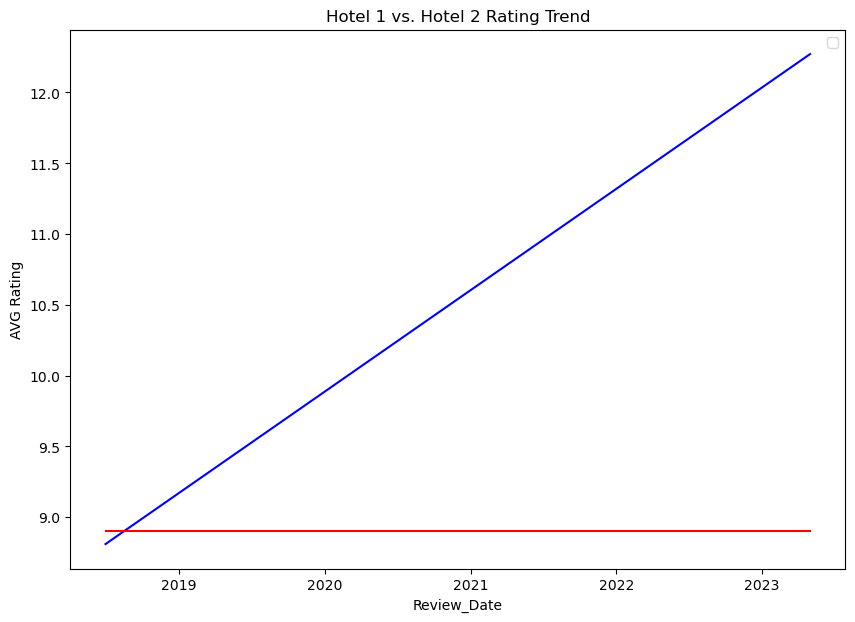

In [67]:
#trend and forecast visualisation
plt.figure(figsize=(10, 7))
plt.plot(forecast['review_date'], forecast['hotel_1_trend'], 'b-')
plt.plot(forecast['review_date'], forecast['hotel_2_trend'], 'r-')
plt.legend(); plt.xlabel('Review_Date'); plt.ylabel('AVG Rating')
plt.title('Hotel 1 vs. Hotel 2 Rating Trend');

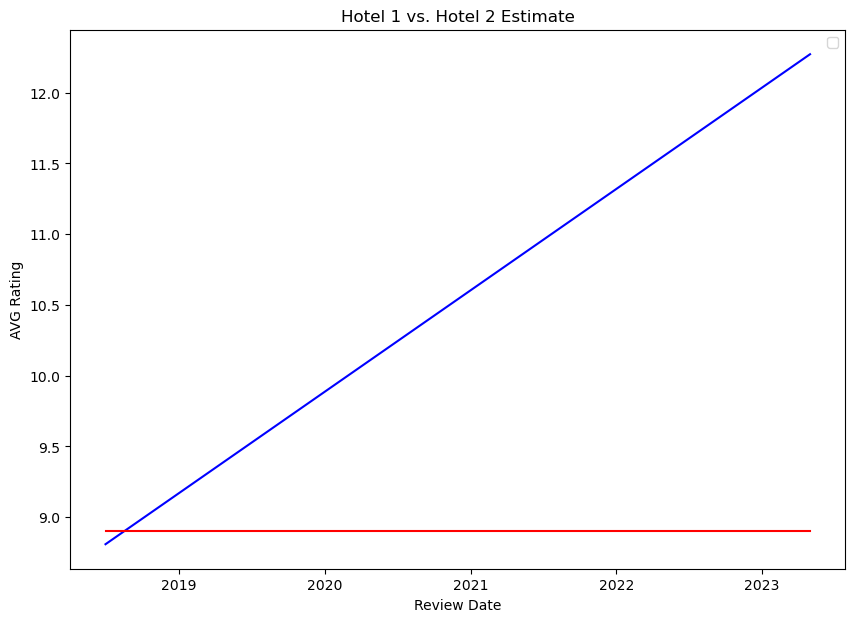

In [68]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['review_date'], forecast['hotel_1_yhat'], 'b-')
plt.plot(forecast['review_date'], forecast['hotel_2_yhat'], 'r-')
plt.legend(); plt.xlabel('Review Date'); plt.ylabel('AVG Rating')
plt.title('Hotel 1 vs. Hotel 2 Estimate');

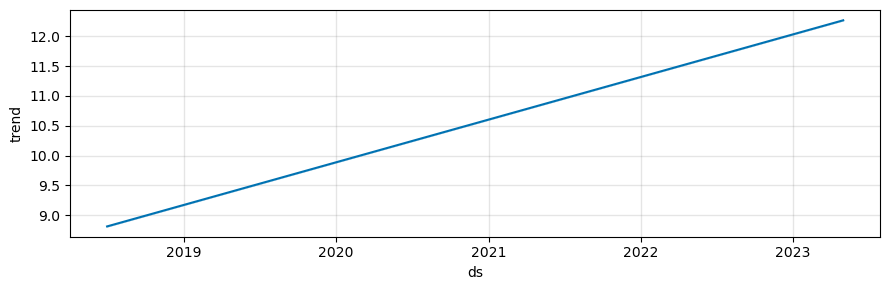

In [69]:
#plot components of time-series
hotel_1_model.plot_components(hotel_1_forecast);

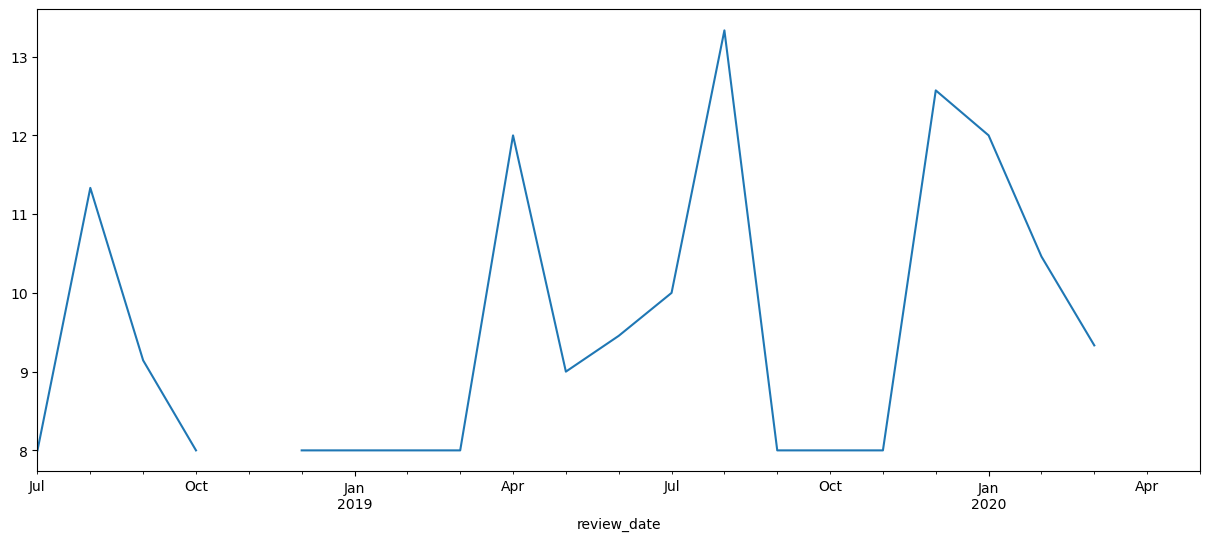

In [70]:
y.plot(x='ds',y='y',figsize=(15, 6))
plt.show()

# **Above, I have used and implemented data analysis and Time Series Modelling. Time Series Modelling and Forecasting are being used with 2 different hotels to generate model according to AVG rating change within a time frame**